### Multivariate Linear Regression 
#### Independent variables - Age, Race
#### Dependent variable - Death count

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [3]:
file = 'fatal-shootings.xlsx'
df = pd.read_excel(file)

df.shape

(6800, 4)

In [4]:
df.dropna(inplace=True) #drop missing values 

In [5]:
df.age = df.age.astype(int) #convert float to int
df.head()

,race,threat_level,victim_armed,age
0,A,attack,armed,53
1,A,attack,armed,35
2,A,attack,armed,35
3,A,attack,armed,28
4,A,other,armed,28


In [6]:
df.describe()

,age
count,6460.000000
mean,37.136842
std,12.973654
min,6.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,92.000000


In [7]:
df = pd.DataFrame({'death_count': df.groupby(['race', 'age']).size()}).reset_index()
df

,race,age,death_count
0,A,15,1
1,A,16,3
2,A,18,3
3,A,19,2
4,A,20,2
...,...,...,...
365,unknown,83,1
366,unknown,86,2
367,unknown,88,1
368,unknown,89,1


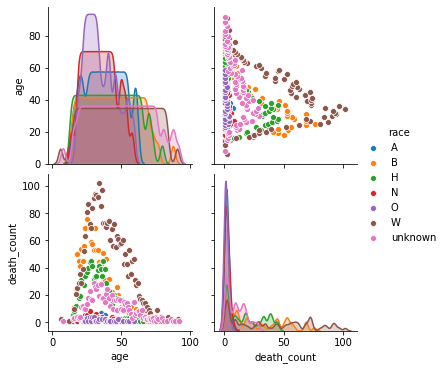

In [8]:
sns.pairplot(df, hue='race', diag_kws={'bw': 1.5})

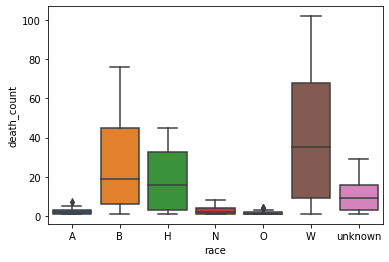

In [9]:
sns.boxplot(y='death_count', x='race', data=df)

In [10]:
X = df[['age', 'race']]

In [11]:
X = pd.get_dummies(X, drop_first=True) #encode categorical values
X.head()

,age,race_B,race_H,race_N,race_O,race_W,race_unknown
0,15,0,0,0,0,0,0
1,16,0,0,0,0,0,0
2,18,0,0,0,0,0,0
3,19,0,0,0,0,0,0
4,20,0,0,0,0,0,0


In [12]:
Y = df['death_count']
Y.head()

0    1
1    3
2    3
3    2
4    2
Name: death_count, dtype: int64

In [13]:
#split dataset into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 7)
(74, 7)
(296,)
(74,)


In [14]:
#import linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#intercept (b)
model.intercept_

20.78430871553533

In [16]:
#slope (m)
coeff_param = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_param

,Coefficient
age,-0.461434
race_B,23.373719
race_H,16.667989
race_N,-1.372725
race_O,-3.354646
race_W,41.628771
race_unknown,13.249463


In [17]:
pred = model.predict(X_test)
pred

array([14.84202521, 14.38059108, 21.11361575, 30.315004  , 26.65082535,
       12.53485454, -4.13313451,  6.99764494, 23.85492613, -7.48778101,
       11.85763865, 37.23651601, 47.18575307, 53.64583095,  3.58663821,
       10.63275777, 22.68640549, 13.45772281, 36.11133386, 33.0836088 ,
       23.60927375, 24.80508882, 24.57548052,  0.81051386, 12.99628868,
        2.2023358 , 25.03691465, 10.01190211,  9.5777624 ,  8.3255871 ,
        0.94264096,  6.02999373, -3.79630794, 38.41850453, 23.42078642,
       30.77643814,  6.01841643, -1.02770313, 17.61063001, 11.09419191,
       28.46926747, 26.62353093, 10.17132364, 28.00783333,  3.767606  ,
       24.11404638, -0.10483487,  4.0405528 ,  3.71124576, 12.95150574,
       15.54911172, -1.48913727,  2.6562504 , 36.572768  , 27.30074682,
       13.73066961, 22.00918959, 10.18290093, 22.93205786, 32.62217467,
       34.00647707, 16.93341412, 16.47197999, 50.87722614, 31.03555839,
       50.41579201,  9.7214668 , 32.16074054, 10.50063067,  2.66

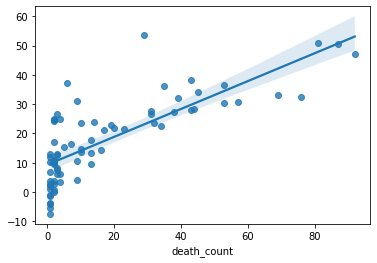

In [18]:
sns.regplot(y_test, pred)

In [19]:
import statsmodels.api as sm 
X_train_sm = sm.add_constant(X_train)

X_train_sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:            death_count   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.22
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.82e-41
Time:                        02:21:20   Log-Likelihood:                -1234.3
No. Observations:                 296   AIC:                             2485.
Df Residuals:                     288   BIC:                             2514.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.7843      3.337      6.229   

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5783267192809605